In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/priyanshugithub2003/Datasets_Data_Science/main/loan_prediction.csv")

In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
pd.set_option('display.max_rows',None)

In [7]:
df.sample(100)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
403,LP002300,Female,No,0,Not Graduate,No,1963,0.000000,53.0,360.0,1.0,Semiurban,Y
557,LP002795,Male,Yes,3+,Graduate,Yes,10139,0.000000,260.0,360.0,1.0,Semiurban,Y
264,LP001872,Male,No,0,Graduate,Yes,5166,0.000000,128.0,360.0,1.0,Semiurban,Y
421,LP002357,Female,No,0,Not Graduate,No,2720,0.000000,80.0,NaN,0.0,Urban,N
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.000000,NaN,360.0,1.0,Urban,Y
465,LP002494,Male,No,0,Graduate,No,6000,0.000000,140.0,360.0,1.0,Rural,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.000000,157.0,360.0,1.0,Rural,Y
62,LP001207,Male,Yes,0,Not Graduate,Yes,2609,3449.000000,165.0,180.0,0.0,Rural,N
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.000000,225.0,360.0,1.0,Urban,Y
166,LP001577,Female,Yes,0,Graduate,No,4583,0.000000,112.0,360.0,1.0,Rural,N


In [8]:
df['Dependents'].replace('3+',4,inplace=True)
df['Dependents'] = df['Dependents'].astype(float)

In [9]:
mode2 = df['Gender'].mode().values[0]
mode3 = df['Married'].mode().values[0]
mode4 = df['Self_Employed'].mode().values[0]
df['Gender'].replace(np.nan,mode2,inplace=True)
df['Married'].replace(np.nan,mode3,inplace=True)
df['Self_Employed'].replace(np.nan,mode4,inplace=True)

In [10]:
median1 =df['LoanAmount'].median()
median2 =df['Loan_Amount_Term'].median()
median3 =df['Credit_History'].median()
median4 = df['Dependents'].median()
df['LoanAmount'].replace(np.nan,median1,inplace=True)
df['Loan_Amount_Term'].replace(np.nan,median2,inplace=True)
df['Credit_History'].replace(np.nan,median3,inplace=True)
df['Dependents'].replace(np.nan,median4,inplace=True)

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
df.duplicated().sum()

0

<AxesSubplot:>

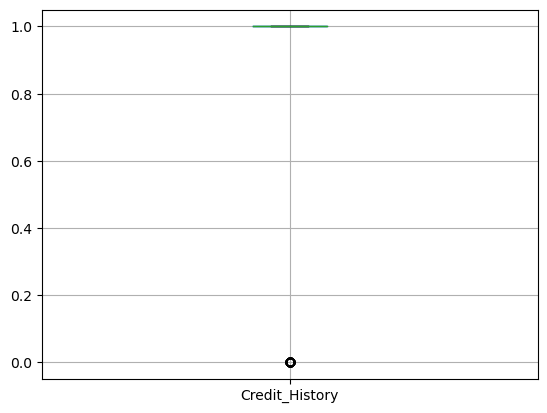

In [14]:
df.boxplot(column='Credit_History')

In [15]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3=col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-1.5*IQR
    upper_range = Q3+1.5*IQR
    return lower_range,upper_range


In [16]:
low,up = remove_outlier(df['ApplicantIncome'])
df['ApplicantIncome']=np.where(df['ApplicantIncome']>up,up,df['ApplicantIncome'])
df['ApplicantIncome']=np.where(df['ApplicantIncome']<low,low,df['ApplicantIncome'])

In [17]:
low,up = remove_outlier(df['CoapplicantIncome'])
df['CoapplicantIncome']=np.where(df['CoapplicantIncome']>up,up,df['CoapplicantIncome'])
df['CoapplicantIncome']=np.where(df['CoapplicantIncome']<low,low,df['CoapplicantIncome'])

In [18]:
low,up = remove_outlier(df['LoanAmount'])
df['LoanAmount']=np.where(df['LoanAmount']>up,up,df['LoanAmount'])
df['LoanAmount']=np.where(df['LoanAmount']<low,low,df['LoanAmount'])

<AxesSubplot:>

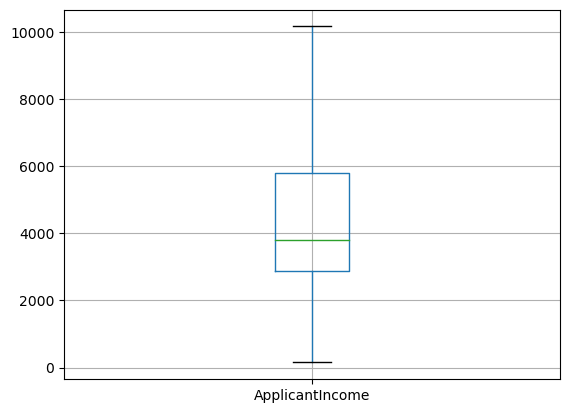

In [19]:
df.boxplot(column='ApplicantIncome')

<AxesSubplot:xlabel='Married', ylabel='count'>

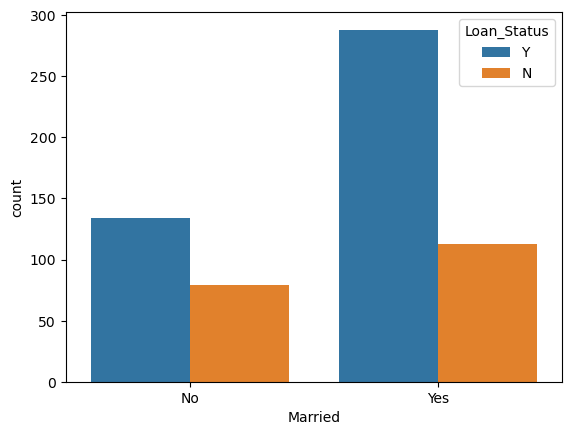

In [20]:
sns.countplot(x=df['Married'],hue=df['Loan_Status'])
# MArried person have more chances of getting loan approved

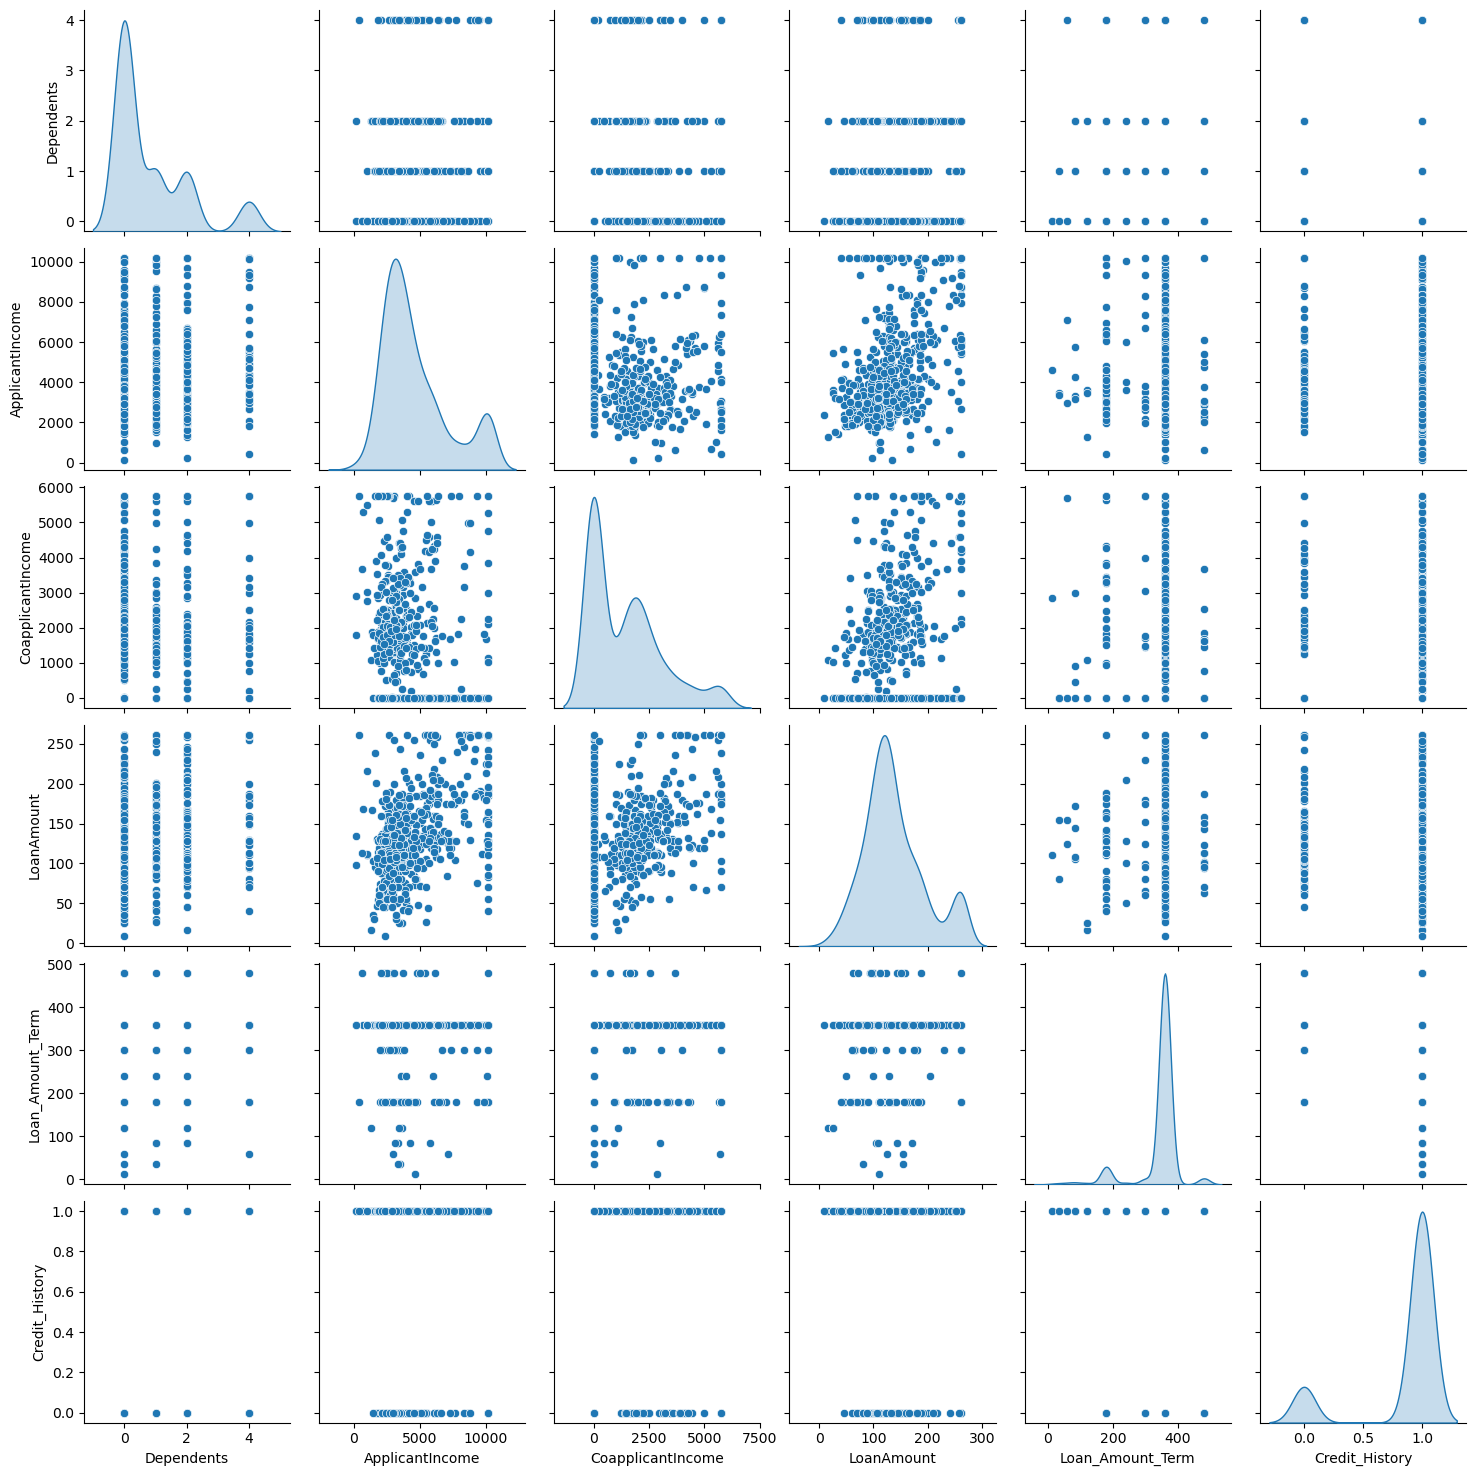

In [21]:
sns.pairplot(df,diag_kind='kde')

In [22]:
corr = df.corr()
corr

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.114097,-0.036705,0.164172,-0.104059,-0.047203
ApplicantIncome,0.114097,1.000000,-0.228956,0.557953,-0.023926,0.035345
CoapplicantIncome,-0.036705,-0.228956,1.000000,0.265021,-0.029295,-0.001710
LoanAmount,0.164172,0.557953,0.265021,1.000000,0.063612,0.004320
Loan_Amount_Term,-0.104059,-0.023926,-0.029295,0.063612,1.000000,-0.004705
Credit_History,-0.047203,0.035345,-0.001710,0.004320,-0.004705,1.000000


<AxesSubplot:>

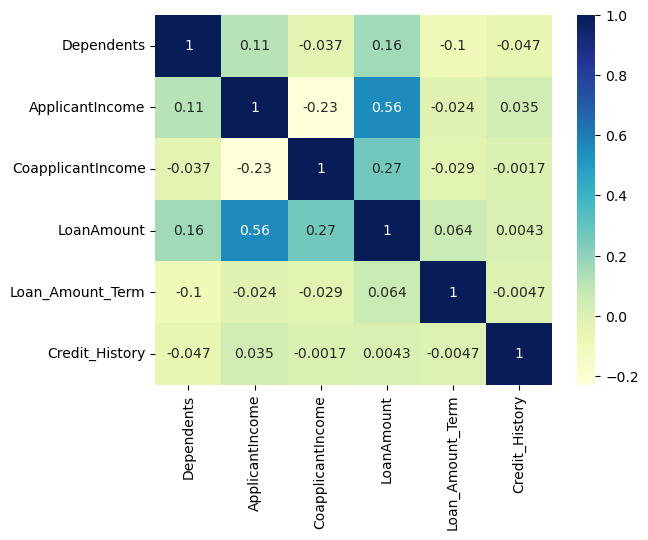

In [23]:
sns.heatmap(corr,annot=True,cmap="YlGnBu")
# a better way to observe correlation

In [24]:
df = df.drop(['Loan_ID'],axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(6), object(6)
memory usage: 57.7+ KB


In [26]:
columns=['Gender','Married','Education','Self_Employed','Property_Area']
dummies = pd.get_dummies(df[columns],columns,drop_first=True)

In [27]:
df = pd.concat([df,dummies],axis=1)

In [28]:
df.drop(columns,axis=1,inplace=True)

In [29]:
x = df.drop(['Loan_Status'],axis=1)
y=df[['Loan_Status']]

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [31]:
reg_model = LogisticRegression()
reg_model.fit(x_train,y_train)

C:\Users\priyanshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [32]:
reg_model.score(x_train,y_train), reg_model.score(x_test,y_test)

(0.8205128205128205, 0.7837837837837838)